# Snowdrift Game

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

In [2]:
import evol_dynamics

In [3]:
import itertools

**Nash equilibriums**

In [158]:
c = 1.5
b = 3

In [159]:
A = np.array([[b - (c / 2), b - c], [b, 0]])

In [160]:
A

array([[2.25, 1.5 ],
       [3.  , 0.  ]])

In [161]:
import nashpy as nash

In [162]:
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.66666667, 0.33333333]), array([0.66666667, 0.33333333]))]

In [163]:
def r(b, c):
    return c / (2 * b - c)

In [164]:
1 - r(b,c)

0.6666666666666667

**Replicator dynamics**

In [165]:
t = np.linspace(0, 10, 100000)  # Obtain 100 time points

In [166]:
def dx(x, t, A):
    """
    Define the derivate of x.
    """
    f = np.dot(A, x)
    phi = np.dot(f, x)
    return x * (f - phi)

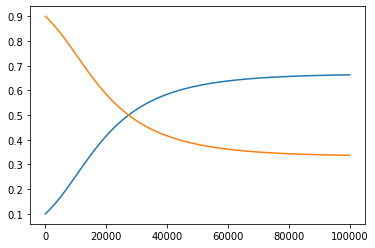

In [167]:
epsilon = 10 ** -1
xs = odeint(func=dx,
            y0=[.1, .9],
            t=t, args=(A,))
plt.plot(xs,);

In [42]:
def average_population_payoffs(A, x):
    f = np.dot(A, x)
    return np.dot(f, x)

In [43]:
average_population_payoffs(A, (.8, .2))

2.4

In [44]:
average_population_payoffs(A, (1, 0))

2.5

**Hawk Dove game**

In [45]:
beta = 2
gamma = 3

In [47]:
B = np.array([[(beta / 2), 0], [beta, (beta - gamma) / 2]])

In [49]:
game = nash.Game(B, B.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.33333333, 0.66666667]), array([0.33333333, 0.66666667]))]

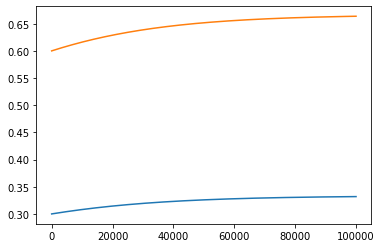

In [51]:
epsilon = 10 ** -1
xs = odeint(func=dx,
            y0=[.3, .6],
            t=t, args=(B,))
plt.plot(xs,);

In [70]:
def is_hawk(b, c):
    if b > b / 2 > 0 > b - (c / 2):
        return True
    return False

In [115]:
def is_snow_drift(S, T, R=1,):
    b = T
    c = b - S
    if b - (c / 2) == R:
        return True
    return False

**Data**

In [90]:
snow_Ss = [0.5, 1, 1.5, 2.5, 3.5, 9.5]
snow_Ts = [1.5, 2, 2.5, 3.5, 4.5, 10.5]

In [91]:
import pandas as pd
import matplotlib

In [88]:
columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [93]:
snows = []
for label in ["one", "three", "four", "six", "seven", "eight"]:
    df = pd.read_csv(f"matlab/data/snow/snow_game_{label}.csv", header=None)
    df.columns = columns
    
    snows.append(df)

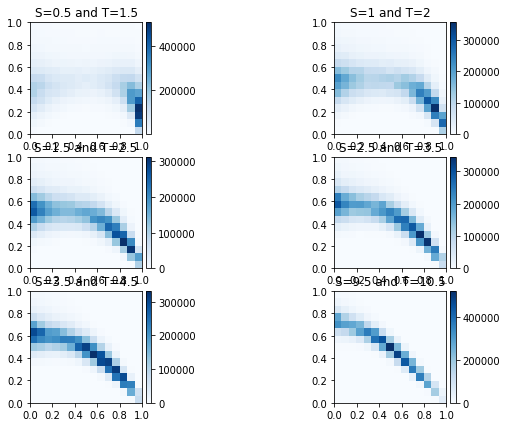

In [94]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7));

for i, snow in enumerate(snows):
    index = (int(i / 2), i % 2)
    x, y = evol_dynamics.numerical._reshape_data(snow)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 6))
    axes[index].set_yticks(np.linspace(0, 1, 6))
    
    axes[index].title.set_text(f"S={snow_Ss[i]} and T={snow_Ts[i]}")

In [128]:
for S, T in zip(snow_Ss, snow_Ts):
    b = T
    c = b - S
    print(is_snow_drift(S, T), "r:", r(b, c), "ratio:", c / b)

True r: 0.5 ratio: 0.6666666666666666
False r: 0.3333333333333333 ratio: 0.5
False r: 0.25 ratio: 0.4
False r: 0.16666666666666666 ratio: 0.2857142857142857
False r: 0.125 ratio: 0.2222222222222222
False r: 0.05 ratio: 0.09523809523809523


In [120]:
pairs = [(1, 5), (2, 9), (3, 8), (5, 6)]

In [104]:
names = ["one", "two", "three", "four"]

In [105]:
snows = []
for label in names:
    df = pd.read_csv(f"matlab/data/pd_and_snow/snow_game_{label}.csv", header=None)
    df.columns = columns
    snows.append(df)

In [106]:
import evol_dynamics

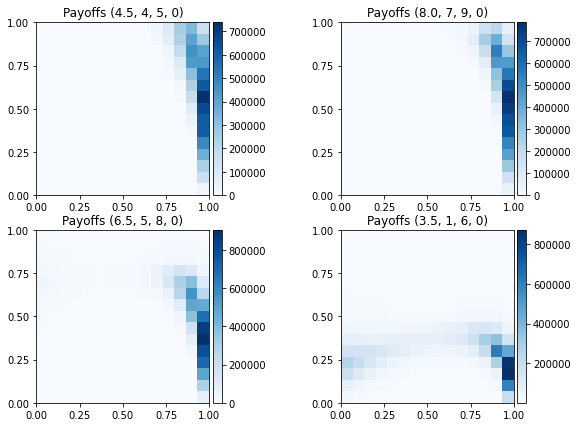

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7));

for i, df in enumerate(snows):
    index = (int(i / 2), i % 2)

    x, y = evol_dynamics.numerical._reshape_data(df)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 5))
    axes[index].set_yticks(np.linspace(0, 1, 5))
    
    axes[index].title.set_text(f"Payoffs {evol_dynamics.snowdrift_game(*pairs[i])}");

In [109]:
[evol_dynamics.snowdrift_game(*pair) for pair in pairs]

[(4.5, 4, 5, 0), (8.0, 7, 9, 0), (6.5, 5, 8, 0), (3.5, 1, 6, 0)]

In [126]:
for payoffs in [evol_dynamics.snowdrift_game(*pair) for pair in pairs]:
    R = payoffs[0]
    T = b = payoffs[2]
    S = payoffs[1]
    c = b - S
    print(is_snow_drift(S, T, R=R), "r", r(b, c))

True r 0.1111111111111111
True r 0.125
True r 0.23076923076923078
True r 0.7142857142857143


**Payoff Matrix**

In [179]:
payoffs = [4.5, 4, 5, 0]
beta = 1
mutant = [0, np.random.random(), np.random.random()]
N = 100
delta = 0.999

In [180]:
mutant

[0, 0.5172832050947741, 0.4816437534114484]

In [181]:
ps = np.linspace(0, 1, 100)
qs = np.linspace(0, 1, 100)

In [188]:
phis = np.empty((ps.size, qs.size))
for i in range(ps.size):
    for j in range(qs.size):
        
        (phi,
         cooperation_rate,
         payoff_MM) = evol_dynamics.fixation_probability_for_expected_payoffs([1, ps[i], qs[j]],
                                                                             mutant,
                                                                             payoffs=payoffs,
                                                                             beta=beta,
                                                                             N=N,
                                                                             delta=delta)
        
        phis[i,j] = 1 - phi


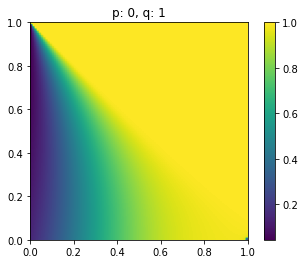

In [189]:
fig = plt.figure();

im = plt.imshow(
    phis,
    extent=(ps[0], ps[-1], qs[0], qs[-1]),
    origin='lower')

fig.colorbar(im);

plt.title("p: 0, q: 1");

In [14]:
p_1, q_1, p_2, q_2 = sym.symbols("p_1, q_1, p_2, q_2")

In [109]:
p = (0, p_1, q_1)
q = (0, p_2, q_2)

In [110]:
ss = evol_dynamics.expected_distribution_last_round(p, q, delta=0.999)

In [111]:
utility = ss @ np.array([1, 0.5, 1.5, 0])

In [112]:
utility.simplify()

(0.999*(q_1 + 0.999*q_2*(p_1 - q_1))*(0.999*q_1*(p_2 - q_2) + q_2) - 0.4995*(q_1 + 0.999*q_2*(p_1 - q_1))*(0.999*p_1*(p_2 - q_2) + q_2 - 1) - 1.4985*(0.999*q_1*(p_2 - q_2) + q_2)*(0.999*p_2*(p_1 - q_1) + q_1 - 1))/((0.998001*(p_1 - q_1)*(p_2 - q_2) - 1)*(0.999*(p_1 - q_1)*(p_2 - q_2) - 1))

In [145]:
utility.subs({p_1: 1, q_1:1, p_2:1, q_2:1}).simplify()

0.999000000000000

In [137]:
def f(x, y):
    return utility.subs({p_1: 0, q_1:0.4, p_2: x, q_2: y})

In [138]:
ps = np.linspace(0, 1, 100)
qs = np.linspace(0, 1, 100)

In [139]:
fun_map = np.empty((ps.size, qs.size))
for i in range(ps.size):
    for j in range(qs.size):
        fun_map[i,j] = f(ps[i], qs[j])

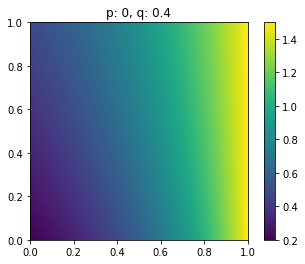

In [140]:
fig = plt.figure();

im = plt.imshow(
    fun_map,
    extent=(ps[0], ps[-1], qs[0], qs[-1]),
    origin='lower')

fig.colorbar(im);

plt.title("p: 0, q: 0.4");

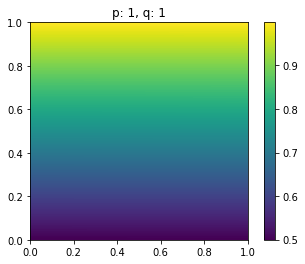

In [136]:
fig = plt.figure();

im = plt.imshow(
    fun_map,
    extent=(ps[0], ps[-1], qs[0], qs[-1]),
    origin='lower')

fig.colorbar(im);

plt.title("p: 1, q: 1");

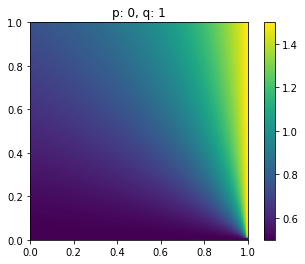

In [132]:
fig = plt.figure();

im = plt.imshow(
    fun_map,
    extent=(ps[0], ps[-1], qs[0], qs[-1]),
    origin='lower')

fig.colorbar(im);

plt.title("p: 0, q: 1");

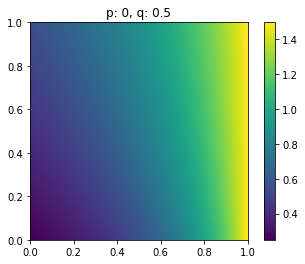

In [127]:
fig = plt.figure();

im = plt.imshow(
    fun_map,
    extent=(ps[0], ps[-1], qs[0], qs[-1]),
    origin='lower')

fig.colorbar(im);

plt.title("p: 0, q: 0.5");

In [125]:
ps, qs = np.linspace(0, 1, 10), np.linspace(0, 1, 10)

In [149]:
payoffs = [[evol_dynamics.expected_distribution_last_round([1, p_1, q_1], [1, p_2, q_2] ,0.999) @ payoff_vector 
            for p_2 in ps for q_2 in qs] 
           for p_1 in ps for q_1 in qs]

In [155]:
A[:, 0].max()

2.0005

In [156]:
def invariant_distribution(M):
    eigenvalues, eigenvectors = np.linalg.eig(M.T)
    eigenvectors_one = eigenvectors[:, np.argmax(eigenvalues)]

    stationary = eigenvectors_one / eigenvectors_one.sum()

    return stationary.real

In [166]:
ss = invariant_distribution(A)

In [168]:
ss.argmax()

99

In [169]:
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

KeyboardInterrupt: 

**Fixation probability**

In [23]:
y, p, q = sym.symbols("y, p, q")

In [108]:
N, k, delta = sym.symbols("N, k, \delta")

In [109]:
resident = [0, 0, 0]
mutant = [y, p, q]

In [110]:
payoff_vector = np.array(evol_dynamics.snowdrift_game(1, 3))

In [111]:
combinations = itertools.product([mutant, resident], repeat=2)

In [112]:
steady_states = [
        evol_dynamics.expected_distribution_last_round(p1, p2, delta) for p1, p2 in combinations
    ]

In [113]:
steady_states

[(\delta*(q + (p - q)*(\delta*q + y*(1 - \delta)))**2/((-\delta*(p - q)**2 + 1)*(-\delta**2*(p - q)**2 + 1)) + y**2*(1 - \delta)/(-\delta**2*(p - q)**2 + 1),
  \delta*(q + (p - q)*(\delta*q + y*(1 - \delta)))*(-q + (-p + q)*(\delta*p + y*(1 - \delta)) + 1)/((-\delta*(p - q)**2 + 1)*(-\delta**2*(p - q)**2 + 1)) + y*(1 - \delta)*(1 - y)/(-\delta**2*(p - q)**2 + 1),
  \delta*(q + (p - q)*(\delta*q + y*(1 - \delta)))*(-q + (-p + q)*(\delta*p + y*(1 - \delta)) + 1)/((-\delta*(p - q)**2 + 1)*(-\delta**2*(p - q)**2 + 1)) + y*(1 - \delta)*(1 - y)/(-\delta**2*(p - q)**2 + 1),
  \delta*(-q + (-p + q)*(\delta*p + y*(1 - \delta)) + 1)**2/((-\delta*(p - q)**2 + 1)*(-\delta**2*(p - q)**2 + 1)) + (1 - \delta)*(1 - y)**2/(-\delta**2*(p - q)**2 + 1)),
 (0, \delta*q + y*(1 - \delta), 0, \delta*(1 - q) + (1 - \delta)*(1 - y)),
 (0, 0, \delta*q + y*(1 - \delta), \delta*(1 - q) + (1 - \delta)*(1 - y)),
 (0, 0, 0, 1)]

In [114]:
payoff_MM, payoff_MR, payoff_RM, payoff_RR = [
        state @ payoff_vector for state in steady_states
    ]

In [123]:
payoff_MM.simplify()

(\delta*(q + (p - q)*(\delta*q - y*(\delta - 1)))*(-2.5*q - 5.0*(p - q)*(\delta*p - y*(\delta - 1)) + 2.5*(p - q)*(\delta*q - y*(\delta - 1)) + 5.0) + y*(5.0 - 2.5*y)*(\delta - 1)*(\delta*(p - q)**2 - 1))/((\delta*(p - q)**2 - 1)*(\delta**2*(p - q)**2 - 1))

In [60]:
expected_payoff_mutant = ((k - 1) / (N - 1) * payoff_MM) + (
            (N - k) / (N - 1)
        ) * payoff_MR

In [63]:
expected_payoff_resident = (k / (N - 1) * payoff_RM) + (
            (N - k - 1) / (N - 1)
        ) * payoff_RR

In [66]:
expected_payoff_mutant.factor()

3.125*(0.15984*N*p**4*q + 0.00016*N*p**4*y - 0.63936*N*p**3*q**2 - 0.00064*N*p**3*q*y + 0.95904*N*p**2*q**3 + 0.000960000000000001*N*p**2*q**2*y - 0.32016016016016*N*p**2*q - 0.000320480640800961*N*p**2*y - 0.63936*N*p*q**4 - 0.00064*N*p*q**3*y + 0.64032032032032*N*p*q**2 + 0.000640961281601923*N*p*q*y + 0.15984*N*q**5 + 0.00016*N*q**4*y - 0.32016016016016*N*q**3 - 0.000320480640800961*N*q**2*y + 0.160320480640801*N*q + 0.000160480961602403*N*y - 0.15984*k*p**4*q - 0.00016*k*p**4*y + 0.63936*k*p**3*q**2 + 0.00064*k*p**3*q*y - 0.4*k*p**3*q - 0.000400400400400401*k*p**3*y - 0.95904*k*p**2*q**3 - 0.000960000000000001*k*p**2*q**2*y + 1.0*k*p**2*q**2 + 0.000800800800800801*k*p**2*q*y - 0.0802402402402403*k*p**2*q + 0.0002002002002002*k*p**2*y**2 - 8.03205608010414e-5*k*p**2*y + 0.63936*k*p*q**4 + 0.00064*k*p*q**3*y - 0.8*k*p*q**3 - 0.000400400400400401*k*p*q**2*y - 0.23991991991992*k*p*q**2 - 0.000400400400400401*k*p*q*y**2 - 0.00024016007999992*k*p*q*y + 0.4004004004004*k*p*q + 0.000400801

In [103]:
expected_payoff_mutant.subs({N:10, k:2,  y:0, q:0.5}).factor()

2.05377777777778*(0.432373945033543*p**4 - 1.0*p**3 - 0.183808186026321*p**2 + 0.785314962224722*p + 0.286587124610267)/((1.0*p**2 - 1.0*p - 0.752003004005006)*(1.0*p**2 - 1.0*p - 0.751001001001001))

TypeError: can't convert expression to float

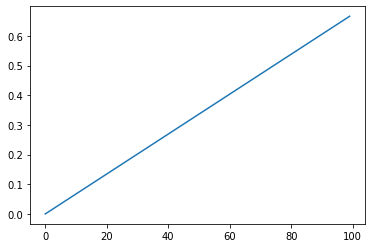

In [99]:
points = [expected_payoff_resident.subs({N:10, k:2,  y:0, q: val}) for val in np.linspace(0, 1, 100)];

mutant_points = [expected_payoff_mutant.subs({N:10, k:2,  y:0, q: val}) for val in np.linspace(0, 1, 100)]

plt.plot(points, label='ALLD');

plt.plot(mutant_points, label="other");

plt.legend()

plt.xticks([i * 10 for i in range(11)], [i / 10 for i in range(11)]);

1.998*q + 0.002*y

In [ ]:
payoff_vector = np.array(payoffs)
    combinations = itertools.product([mutant, resident], repeat=2)

    steady_states = [
        evol_dynamics.steady_state(p1, p2, delta) for p1, p2 in combinations
    ]
    payoff_MM, payoff_MR, payoff_RM, payoff_RR = [
        state @ payoff_vector for state in steady_states
    ]
    lminus, lplus = [], []
    for k in range(1, N):
        expected_payoff_mutant = ((k - 1) / (N - 1) * payoff_MM) + (
            (N - k) / (N - 1)
        ) * payoff_MR
        expected_payoff_resident = (k / (N - 1) * payoff_RM) + (
            (N - k - 1) / (N - 1)
        ) * payoff_RR

        lplus.append(
            1
            / (
                1
                + np.exp(
                    float(
                        -beta
                        * (expected_payoff_mutant - expected_payoff_resident)
                    )
                )
            )
        )
        lminus.append(
            1
            / (
                1
                + np.exp(
                    float(
                        -beta
                        * (expected_payoff_resident - expected_payoff_mutant)
                    )
                )
            )
        )
    gammas = np.array(lminus) / np.array(lplus)
    cooperation_rate = steady_states[0][0] + steady_states[0][1]
    return (
        1 / (1 + np.sum(np.cumprod(gammas))),
        cooperation_rate,
        payoff_MM,
    )